In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


# data checking

In [26]:
#dataType of the each fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [27]:
#count of null field
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [28]:
# % of null field
df. isnull(). sum() * 100 / len(df)

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

# checking null field in drop timestamp
Data is null for column Drop timestamp is only when :
- Driver cancelled the ride or car not available.

In [29]:
df[df['Drop timestamp'].isnull()].Status.value_counts()

No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

# checking for duplicated row in table

In [30]:
sum(df.duplicated(subset= 'Request id'))==0

True

# Ensure that the dates and times are in the proper format

In [31]:
#converting Request timestamp and Drop timestamp data type from object to datatime
df['Request timestamp']=pd.to_datetime(df['Request timestamp'],dayfirst=True)
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'],dayfirst=True)

In [32]:
#validating the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [33]:
#check value is converted properly or not for df['Request timestamp']
df['Request timestamp'].apply(lambda x : 'yes' if str(x).find('/')== -1 else 'NO').value_counts()

yes    6745
Name: Request timestamp, dtype: int64

In [34]:
#check value is converted properly or not for df['Request timestamp']
df['Drop timestamp'].apply(lambda x : 'yes' if str(x).find('/')== -1 else 'NO').value_counts()

yes    6745
Name: Drop timestamp, dtype: int64

# Derive new variables which will be useful for analysis

In [35]:
#To use dataTime function format must be in form '"%Y-%m-%d %H:%M:%S"'
df['Request timestamp'].head()

0   2016-07-11 11:51:00
1   2016-07-11 17:57:00
2   2016-07-12 09:17:00
3   2016-07-12 21:08:00
4   2016-07-13 08:33:16
Name: Request timestamp, dtype: datetime64[ns]

In [36]:
#derive day from Request timestamp
df['Day_Request_timestamp']=df['Request timestamp'].dt.day
df['Day_Request_timestamp'].value_counts()

15    1381
11    1367
14    1353
13    1337
12    1307
Name: Day_Request_timestamp, dtype: int64

In [37]:
#derive hour from Request timestamp
df['hour_Request_timestamp']=df['Request timestamp'].dt.hour
df['hour_Request_timestamp'].value_counts(ascending=True)

1      85
3      92
0      99
2      99
14    136
16    159
13    160
15    171
11    171
12    184
23    194
4     203
10    243
22    304
6     398
7     406
17    418
8     423
9     431
5     445
21    449
19    473
20    492
18    510
Name: hour_Request_timestamp, dtype: int64

1. Most of request raise between 5-9 A.M and 5-9 P.M 
2. Most of cab request generated on Wednesday

In [38]:
#Full weekday name for day
df['Request_Weekday'] = df['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
df['Request_Weekday'].value_counts()

Friday       1381
Monday       1367
Thursday     1353
Wednesday    1337
Tuesday      1307
Name: Request_Weekday, dtype: int64

#### Analysis Pickup point

In [39]:
#how many unique value for Pickup point
df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [40]:
#Calculate the percentage of each PickUp Point category. 
df['Pickup point'].value_counts(normalize=True)*100

City       51.99407
Airport    48.00593
Name: Pickup point, dtype: float64

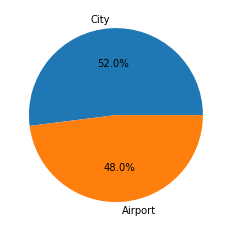

In [41]:
plt.pie(df['Pickup point'].value_counts(normalize=True)*100,labels=['City','Airport'],autopct='%1.1f%%')
plt.show()

In [55]:
df.to_csv('uber_data.csv')

# Visually identify the most pressing problems for Uber.

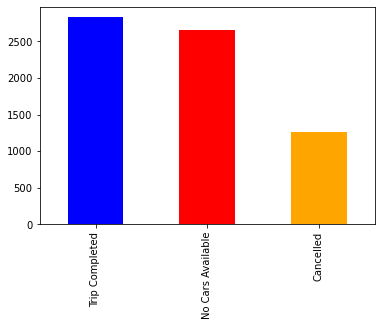

In [42]:
#Plotting the bar graph on number of status categories
df.Status.value_counts().plot.bar(color= ['blue','red','orange'])
plt.show()

Session Details
Late Night: Midnight to 4AM
Early Morning: 4AM-8AM
Late Morning: 8AM-Noon
Afternoon: Noon-4PM
Evening: 4PM-8PM
Night: 8PM-Midnight

In [43]:
#dividing the trips into 6 sessions based on dt.hour from Request Timestamp
session_label=session_labels=['Late Night','Early Morning','Late Morning','Afternoon','Evening','Night']
df=df.assign(session=pd.cut(df['hour_Request_timestamp'],[-1,4,8,12,16,20,24],labels=session_labels))
df.session.value_counts(normalize=True)*100

Evening          28.065234
Early Morning    24.788732
Late Morning     15.255745
Night            14.040030
Afternoon         9.280949
Late Night        8.569311
Name: session, dtype: float64

In [44]:
#checking data
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day_Request_timestamp,hour_Request_timestamp,Request_Weekday,session
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Monday,Late Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,9,Tuesday,Late Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,21,Tuesday,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,Wednesday,Early Morning


In [45]:
#share/frequency of all "Trip Status from Airport" over the day to identify problem areas
print(df[df['Pickup point']=='Airport'].groupby(['session','Status']).Status.count())

session        Status           
Late Night     Cancelled               2
               No Cars Available     148
               Trip Completed        103
Early Morning  Cancelled              15
               No Cars Available      14
               Trip Completed        308
Late Morning   Cancelled              32
               No Cars Available      44
               Trip Completed        239
Afternoon      Cancelled              40
               No Cars Available      50
               Trip Completed        162
Evening        Cancelled              78
               No Cars Available    1067
               Trip Completed        312
Night          Cancelled              31
               No Cars Available     390
               Trip Completed        203
Name: Status, dtype: int64


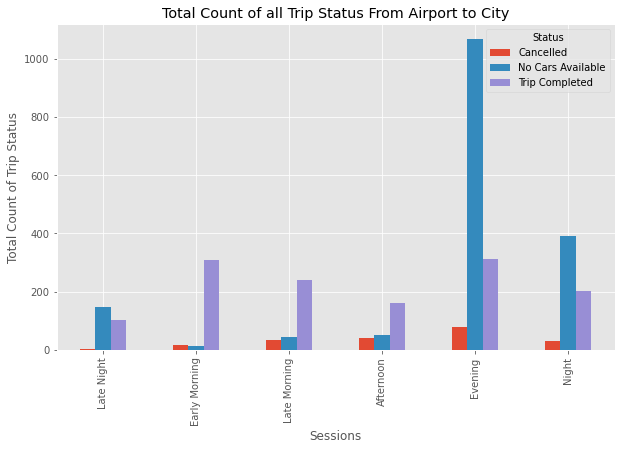

In [46]:
# plotting share/frequency of all "Trip Status from Airport" over the day to identify problem areas

plt.style.use('ggplot')
df[df['Pickup point']=='Airport'].groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(10,6))
plt.title('Total Count of all Trip Status From Airport to City')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trip Status')
plt.show()


Observations for Airport to City:
1. Maximum number of "No Cars Available" status trips can be seen in Evening Session (Time Slot: 4PM to 8PM), followed by Night session (8PM to Midnight).
2. Maximum number of "Cancelled" status trips also be can be seen in Evening Session (Time Slot: 4PM to 8PM).
3. Maximum number of "Trip Completed" status trips also be can be seen in Early Morning (Time Slot: 4AM to 8AM).

In [47]:
#share/frequency of all "Trip Status from City" over the day to identify problem areas
df[df['Pickup point']=='City'].groupby(['session','Status']).Status.count()

session        Status           
Late Night     Cancelled             63
               No Cars Available    151
               Trip Completed       111
Early Morning  Cancelled            653
               No Cars Available    309
               Trip Completed       373
Late Morning   Cancelled            239
               No Cars Available    189
               Trip Completed       286
Afternoon      Cancelled             32
               No Cars Available    134
               Trip Completed       208
Evening        Cancelled             46
               No Cars Available     60
               Trip Completed       330
Night          Cancelled             33
               No Cars Available     94
               Trip Completed       196
Name: Status, dtype: int64

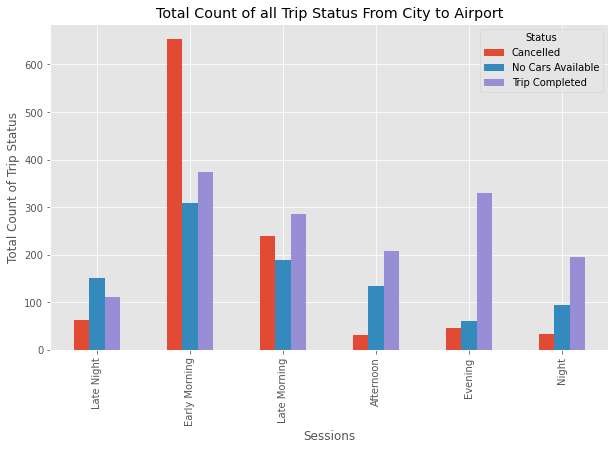

In [48]:
# plotting share/frequency of all "Trip Status from City" over the day to identify problem areas

plt.style.use('ggplot')
df[df['Pickup point']=='City'].groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(10,6))
plt.title('Total Count of all Trip Status From City to Airport')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trip Status')
plt.show()


Observations for City to Airport:
1. Maximum number of all status for the trips can be seen in Early Morning (Time Slot: 4AM to 8AM).

Inference:
1. Airport to City peak hour is Evening(4PM to 8PM) and customer is facing 'no car available' issue.
2. City to Airport peak hour is Early morning(4AM to 8PM) and customer is facing 'cancelled' of ride issue.

# Find out the gap between supply and demand and show the same using plots.

**TERMS**
1. Demand - All the request generated
2. Supply - Trip Completed
3. Gap - (Demand-Supply) which is 'no car available' and 'cancelled'

1. Find the time slots when the highest gap exists

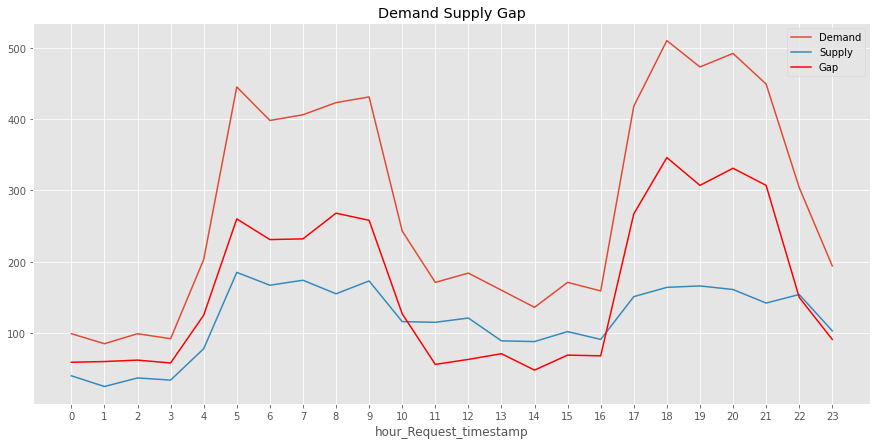

In [49]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
df.groupby(df['hour_Request_timestamp']).count()['Request id'].plot(ax=ax, label='Demand')
df[df['Status']=="Trip Completed"].groupby(df[df['Status']=="Trip Completed"]['hour_Request_timestamp']).count()['Request id'].plot(ax=ax, label='Supply')
(df.groupby(df['hour_Request_timestamp']).count()['Request id'] - df[df['Status']=="Trip Completed"].groupby(df[df['Status']=="Trip Completed"]['hour_Request_timestamp']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap")
plt.legend()

Observations:
1. Gap is maxmium in afternoon(4PM - 8PM), when demand is much large than supply.
2. Overall if we see than demand is more than cab supply

Inference:

**Demand > Supply** equation remain like this all time.

2. Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

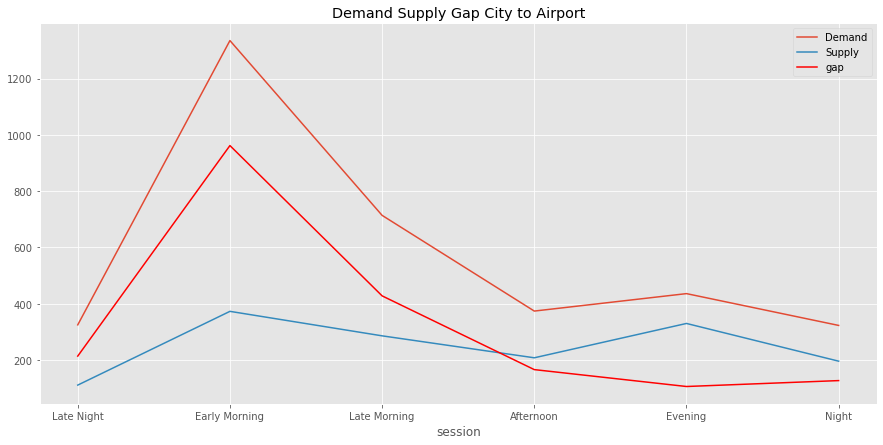

In [56]:
#Plotting Supply and Demand on the City to Airport Route
fig, ax = plt.subplots(figsize=(15,7))
df[df['Pickup point']=='City'].groupby(['session']).count()['Request id'].plot.line(label='Demand')
df[df['Pickup point']=='City'][df['Status']=="Trip Completed"].groupby(['session']).count()['Request id'].plot.line(label='Supply')
(df[df['Pickup point']=='City'].groupby(['session']).count()['Request id']-df[df['Pickup point']=='City'][df['Status']=="Trip Completed"].groupby(['session']).count()['Request id']).plot.line(label='gap',c='red')
plt.grid("on")
plt.title("Demand Supply Gap City to Airport")
plt.legend()

Inference:
We observe that the Demand is very high in the morning from City to Airport route but the supply is very low

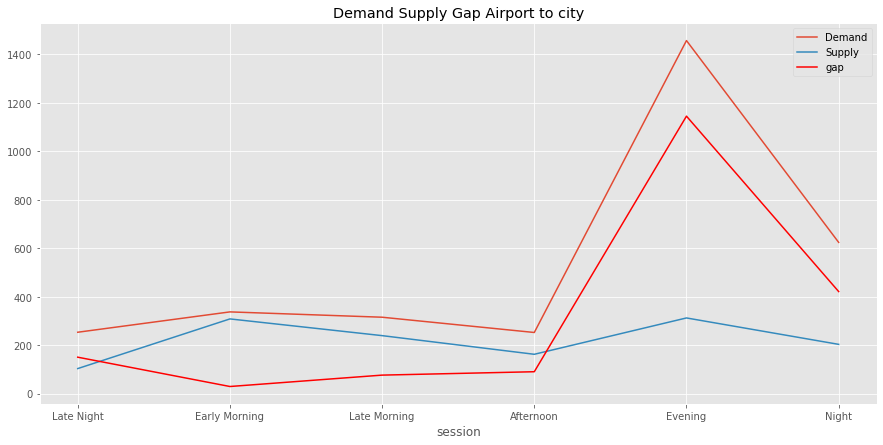

In [57]:
#Plotting Supply and Demand on the Airport to City Route
fig, ax = plt.subplots(figsize=(15,7))
df[df['Pickup point']=='Airport'].groupby(['session']).count()['Request id'].plot.line(label='Demand')
df[df['Pickup point']=='Airport'][df['Status']=="Trip Completed"].groupby(['session']).count()['Request id'].plot.line(label='Supply')
(df[df['Pickup point']=='Airport'].groupby(['session']).count()['Request id']-df[df['Pickup point']=='Airport'][df['Status']=="Trip Completed"].groupby(['session']).count()['Request id']).plot.line(label='gap',c='red')
plt.grid("on")
plt.title("Demand Supply Gap Airport to city")
plt.legend()

Inference:
    We observe that the Demand is very high in the evening in the Airport to City route but the supply is very low

# 3. What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. You may accompany the write-up with plot(s).

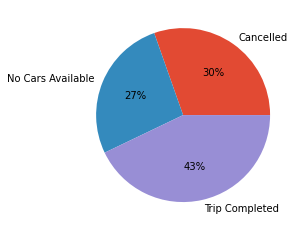

In [52]:
# Ride from City to Airport
plt.pie(df[df['Pickup point']=='City'].groupby(['Status']).Status.count(), labels=['Cancelled','No Cars Available','Trip Completed'], autopct='%.0f%%')
plt.show()

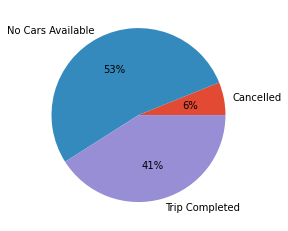

In [53]:
# Ride from Airport to City
plt.pie(df[df['Pickup point']=='Airport'].groupby(['Status']).Status.count(), labels=['Cancelled','No Cars Available','Trip Completed'], autopct='%.0f%%')
plt.show()


Reason:

1. In the mornings, a lot of flights usually leave the city and less flights arrive. Also, it doesn’t make any economical sense to come back empty from the Airport to the City that why driver cancelled the ride.

2. Trip to Airport from the City usually takes a longer time. Once the driver is in the Airport, he will have a longer idle time depending on the on the flights patterns that why driver don't want to go.

3. By the evening, a lot of flights including the international ones start arriving at the airport. This creates a high demand for the cars. Also, the Uber driver partners start retiring for the day as the dawn proceeds leading to a high non availability of the cars.  

# 4.  Recommend some ways to resolve the supply-demand gap.

1. Setting targets for drivers to take up the City to Airport or Airport to City trips and then suitably rewarding them through lucky draw schemes, gift vouchers.

2. Encourage ride-sharing or Taxi pooling for customers leaving the airport during the Late Evening Rush Hour. This will improve the number of customers serviced through fewer supply of taxis.

3. Surge Charge the customer for late evening trips from the airport to encourage more drivers to initiate a trip toward the airport during the late evening rush hour.

4. Maintaining transparency with respect to the surge charging of customers during Late Evening Rush Hour.

5. Uber can increase market share by marketing campaigns and offers to customers when demand is low.
